In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
!pip install --quiet scvi-colab
from scvi_colab import install

install()

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


In [3]:
import os
import tempfile

import gdown
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scvi
import seaborn as sns
import torch
from scvi.external import CellAssign
import numpy as np


ModuleNotFoundError: No module named 'scanpy'

In [ ]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0


Last run with scvi-tools version: 1.1.2


In [ ]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = ('/content/drive/Shareddrives/寶可夢大集結/生醫數據實作/作業/Single_cell')

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [ ]:
follicular_adata = sc.read('/content/drive/Shareddrives/寶可夢大集結/生醫數據實作/作業/Single_cell/file_for_cellassign/data_withoutX.h5ad')
fl_celltype_markers = pd.read_csv('/content/drive/Shareddrives/寶可夢大集結/生醫數據實作/作業/Single_cell/file_for_cellassign/marker_gene_mat.csv', index_col=0)
follicular_adata.obs.index = follicular_adata.obs.index.astype("str")
follicular_adata.var.index = follicular_adata.var.index.astype("str")
follicular_adata.var_names_make_unique()
follicular_adata.obs_names_make_unique()

follicular_adata

AnnData object with n_obs × n_vars = 5909 × 24109
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
fl_celltype_markers = pd.read_csv('/content/drive/Shareddrives/寶可夢大集結/生醫數據實作/作業/Single_cell/file_for_cellassign/marker_gene_mat.csv', index_col=0)

In [5]:
fl_celltype_markers

,CD4 T cells,CD14+ Monocytes,B cells,CD8 T cells,NK cells,FCGR3A+ Monocytes,Dendritic Cells,Megakaryocytes,other
IL7R,1,0,0,0,0,0,0,0,0
CD14,0,1,0,0,0,0,0,0,0
LYZ,0,1,0,0,0,0,0,0,0
MS4A1,0,0,1,0,0,0,0,0,0
CD8A,0,0,0,1,0,0,0,0,0
GNLY,0,0,0,0,1,0,0,0,0
NKG7,0,0,0,0,1,0,0,0,0
FCGR3A,0,0,0,0,0,1,0,0,0
MS4A7,0,0,0,0,0,1,0,0,0
FCER1A,0,0,0,0,0,0,1,0,0


In [ ]:
# Define new_fl_celltype_markers outside of the loop or function
new_fl_celltype_markers = None

# Check if all values in fl_celltype_markers.index exist in follicular_adata.var_names
invalid_values = [val for val in fl_celltype_markers.index if val not in follicular_adata.var_names]

# Filter out invalid values from fl_celltype_markers.index
valid_index_values = [val for val in fl_celltype_markers.index if val in follicular_adata.var_names]

new_fl_celltype_markers = fl_celltype_markers.loc[valid_index_values]

follicular_bdata = follicular_adata[:, new_fl_celltype_markers.index].copy()


In [ ]:
follicular_bdata.obs["size_factor"] = follicular_bdata.X.sum(1)

In [ ]:
scvi.external.CellAssign.setup_anndata(follicular_bdata, "size_factor")
from scvi.external import CellAssign
model = CellAssign(follicular_bdata, new_fl_celltype_markers)
model.train()

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_layer_field.py:115: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  _verify_and_correct_data_format(adata, self.attr_name, self.attr_key)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 -

Epoch 400/400: 100%|██████████| 400/400 [00:58<00:00, 11.46it/s, v_num=1, train_loss_step=5.76, train_loss_epoch=6.32]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [00:58<00:00,  6.80it/s, v_num=1, train_loss_step=5.76, train_loss_epoch=6.32]


<Axes: xlabel='epoch'>

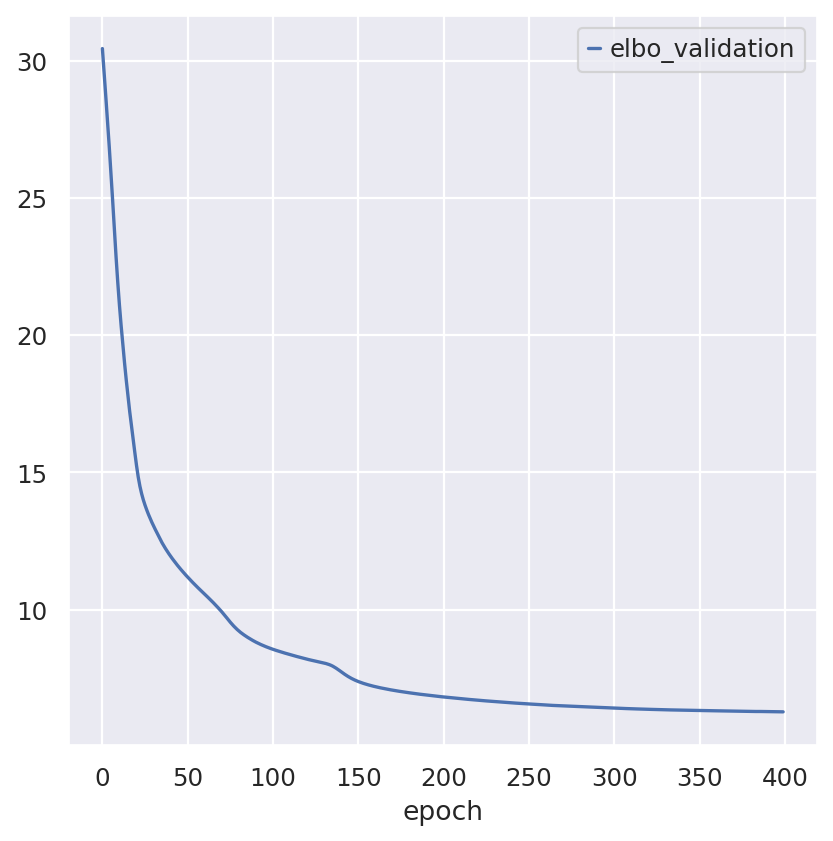

In [ ]:
model.history["elbo_validation"].plot()

In [ ]:
predictions = model.predict()
predictions.head()

,CD4 T cells,CD14+ Monocytes,B cells,CD8 T cells,NK cells,FCGR3A+ Monocytes,Dendritic Cells,Megakaryocytes,other
0,4.150602e-14,0.000340,0.000123,0.000069,0.005889,0.992772,0.000159,0.000063,0.000585
1,4.025370e-14,0.000338,0.000120,0.000069,0.005894,0.992797,0.000153,0.000060,0.000569
2,8.443085e-09,0.000286,0.000529,0.000261,0.000514,0.996299,0.000520,0.000210,0.001381
3,4.866005e-14,0.000359,0.000142,0.000074,0.005723,0.992762,0.000193,0.000076,0.000671
4,5.210769e-04,0.002937,0.004305,0.001174,0.003744,0.983345,0.001101,0.000456,0.002416


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


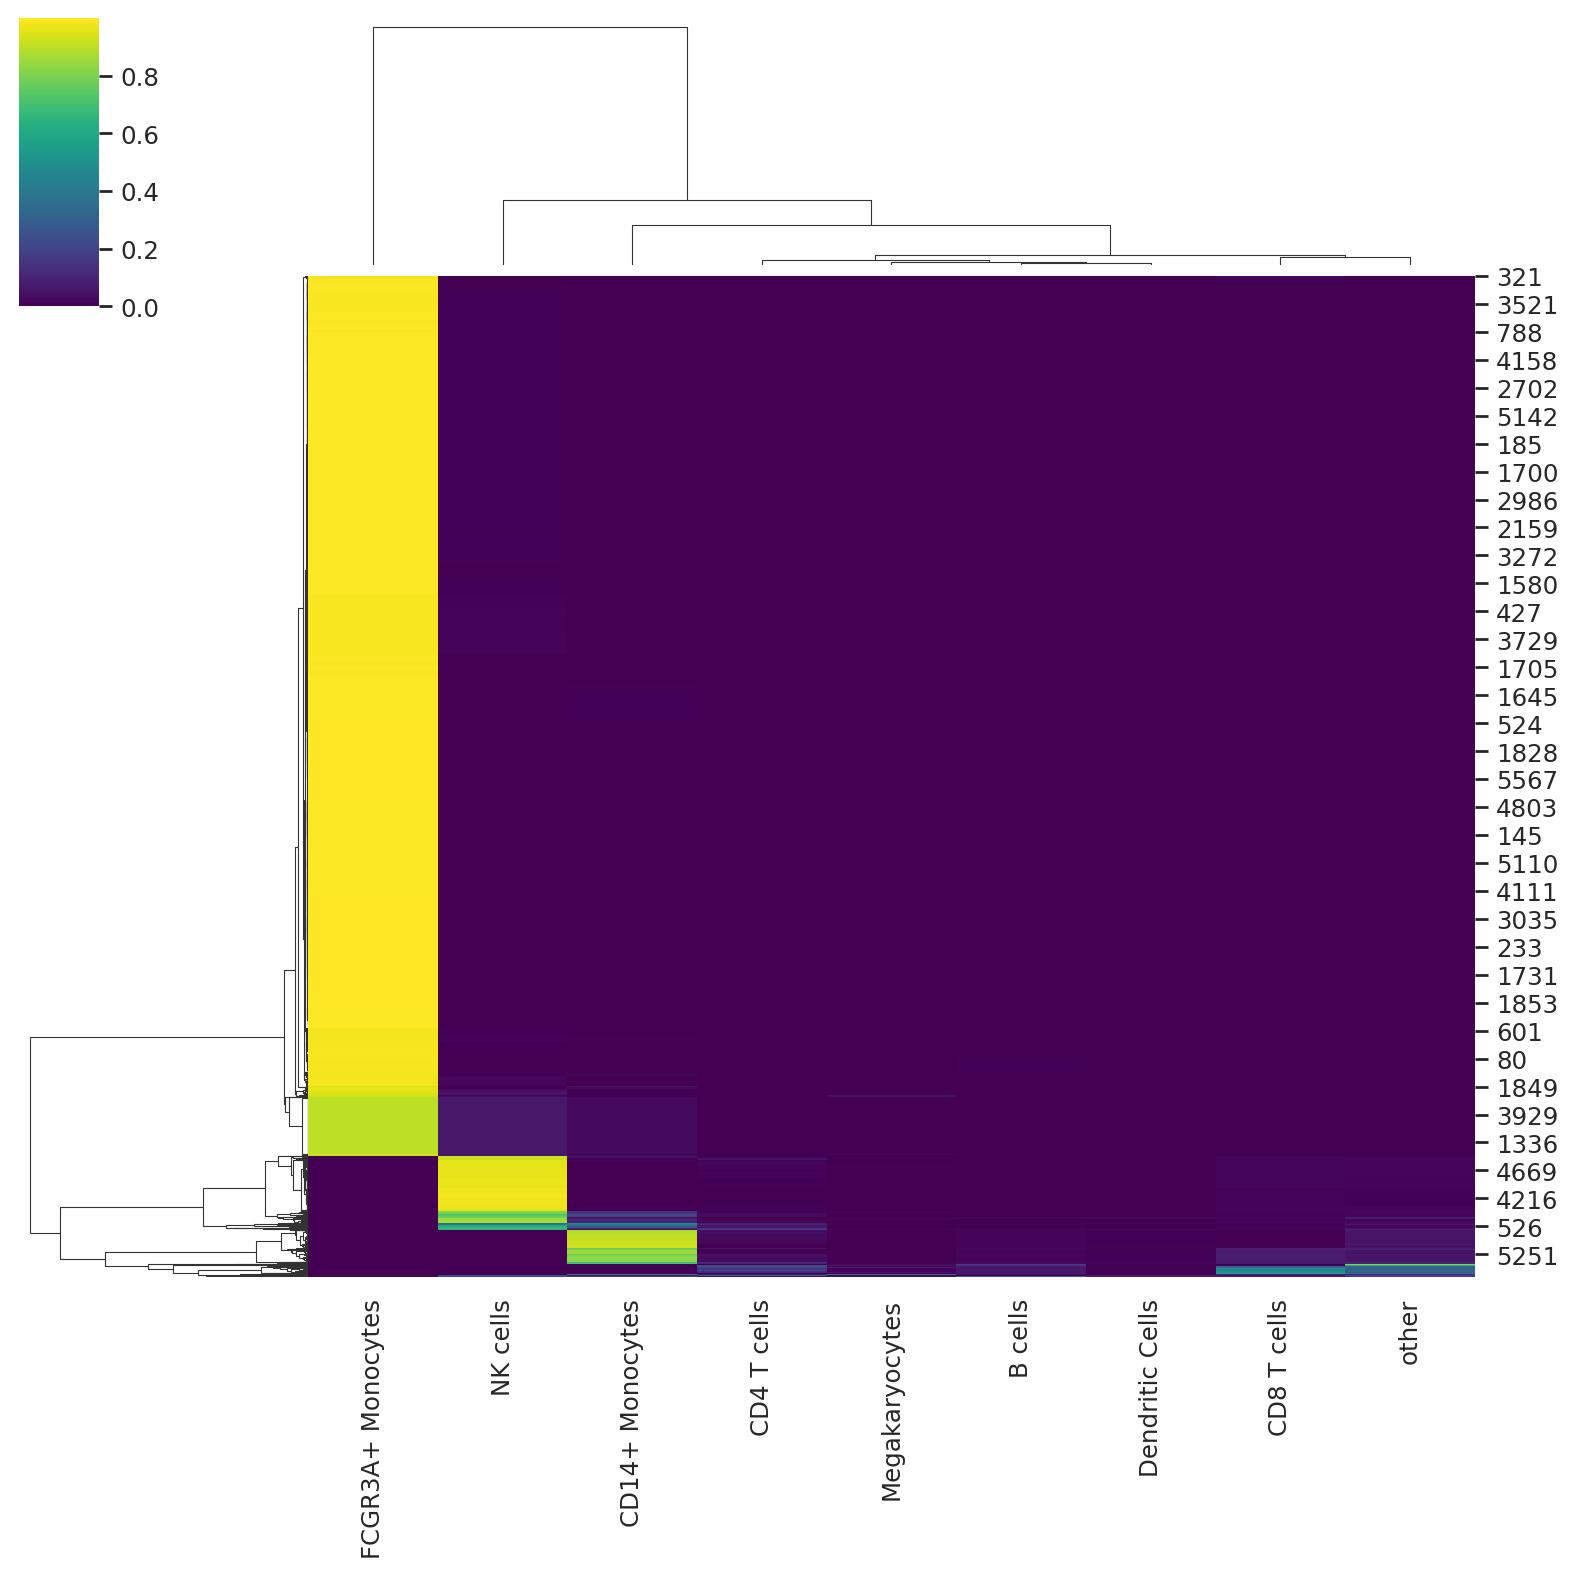

In [ ]:
sns.clustermap(predictions, cmap="viridis")

In [ ]:
follicular_bdata.obs["scvi-tools predictions"] = predictions.idxmax(axis=1).values

In [ ]:
print(follicular_bdata.obs)

                    n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAAGGTAATCA-1     2582               2582        7914.0            206.0   
AAACCCAGTCGATTAC-1     2293               2292        6813.0             77.0   
AAACGAAAGGTAGCAC-1     3341               3339       10345.0            275.0   
AAACGAACATTCTTCA-1     1685               1684        3467.0            158.0   
AAACGAAGTATACAGA-1     2363               2363        7134.0            207.0   
...                     ...                ...           ...              ...   
TTTGTTGCAAGTGTCT-1      912                912        1487.0              1.0   
TTTGTTGCAGGAATAT-1     2182               2181        6397.0            208.0   
TTTGTTGCATCTATCT-1     2985               2985        7774.0            199.0   
TTTGTTGGTGTGCCTG-1     3438               3436       10653.0            400.0   
TTTGTTGGTTGCGGAA-1     2393               2393        6916.0            175.0   

                    pct_cou

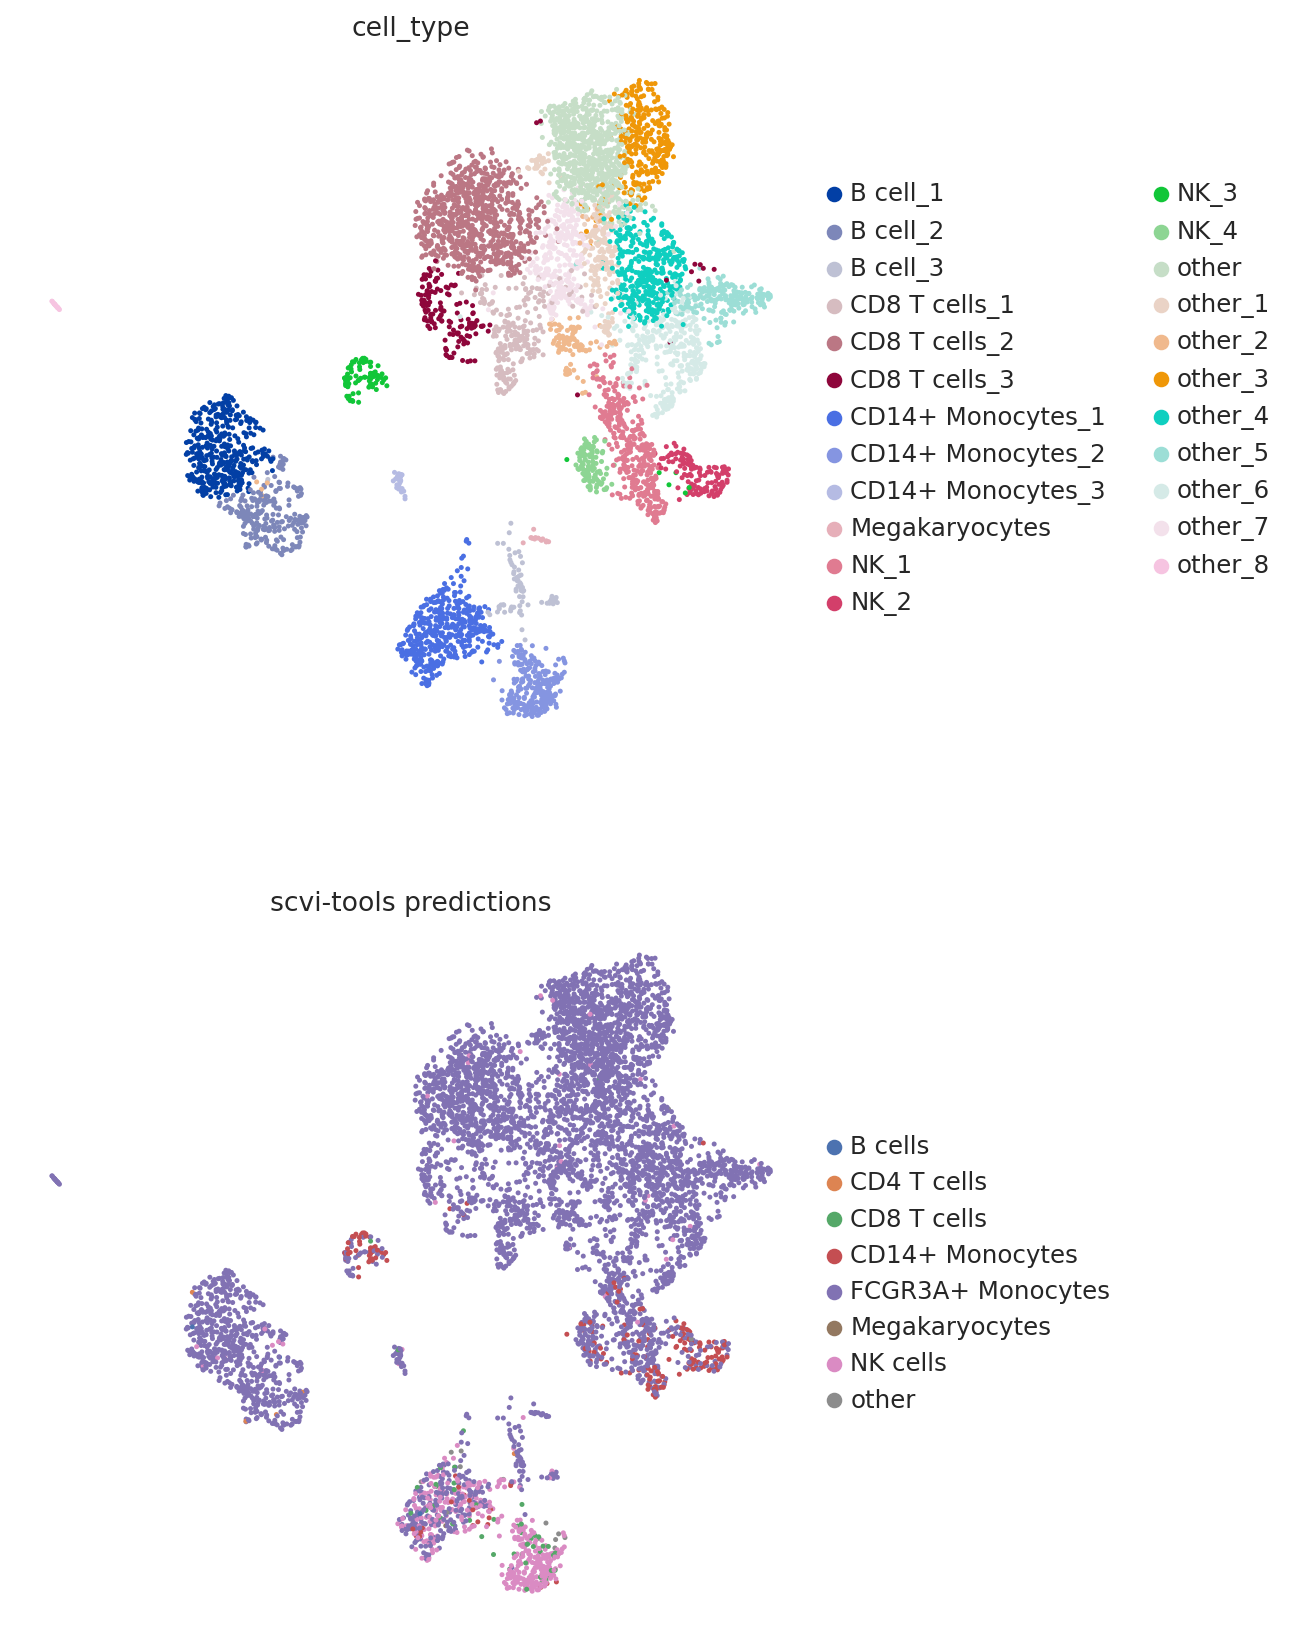

In [ ]:
# celltype is the original CellAssign prediction
sc.pl.umap(
    follicular_bdata,
    color=["cell_type", "scvi-tools predictions"],
    frameon=False,
    ncols=1
)

<ipython-input-16-eae005e720c3>:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  confusion_matrix /= confusion_matrix.sum(1).ravel().reshape(-1, 1)


<Axes: xlabel='Original predictions', ylabel='scvi-tools predictions'>

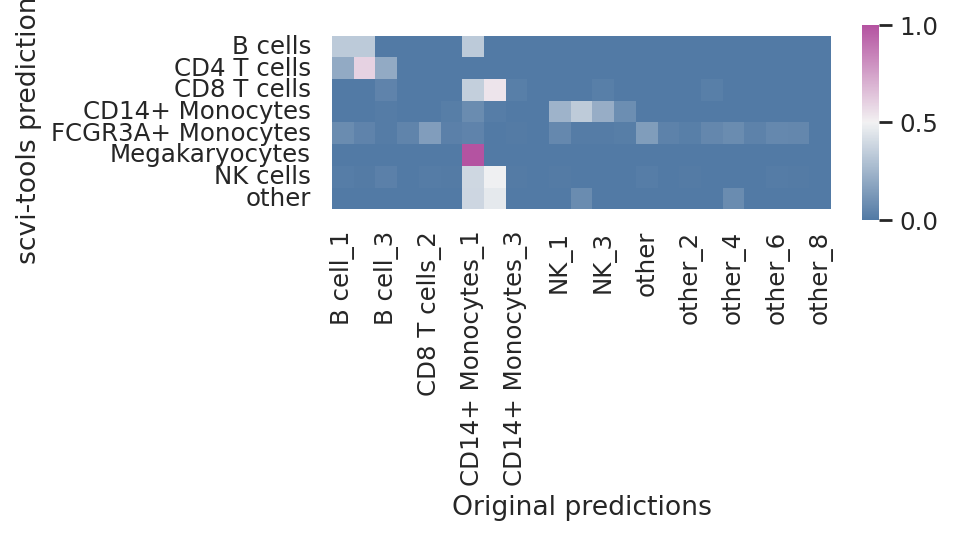

In [ ]:
df = follicular_bdata.obs
confusion_matrix = pd.crosstab(
    df["scvi-tools predictions"],
    df["cell_type"],
    rownames=["scvi-tools predictions"],
    colnames=["Original predictions"],
)
confusion_matrix /= confusion_matrix.sum(1).ravel().reshape(-1, 1)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    confusion_matrix,
    cmap=sns.diverging_palette(245, 320, s=60, as_cmap=True),
    ax=ax,
    square=True,
    cbar_kws=dict(shrink=0.4, aspect=12),
)